IMPORTING  LIBRARIES 

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


READING  CSV

In [25]:
amazon_data = pd.read_csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")


The pandas function read_csv() reads in values, where the delimiter is a comma character. You can export a file into a csv file in any modern office suite including Google Sheets. Use the following csv data as an example. If you want to export data from a DataFrame or pandas.

In [26]:
amazon_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it

In [27]:
amazon_data.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


Return the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

In [28]:
amazon_data.shape

(550, 7)


The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 

In [29]:
amazon_data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

Pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. It can be thought of as a dict-like container for Series objects

amazon_data.head() #Inspecting the first  5 rows 

In [30]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB



The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

IF OUR DATA HAVE SOME DUPLICATE ROWS.WE USE THE ABOVE CODE TO DROPE THE DUPLICATES.

In [31]:
amazon_data.drop_duplicates(inplace = True)
amazon_data.shape

(550, 7)

The shape is a tuple of integers. ... In other words: The "shape" of an array is a tuple with the number of elements per axis (dimension). In our example, the shape is equal to (6, 3), i.e. we have 6 lines and 3 columns
shape attribute returns a tuple of the shape of the underlying data for the given series objects. Example #1: Use Series. shape attribute to find the shape of the underlying data of the given series object

<AxesSubplot:>

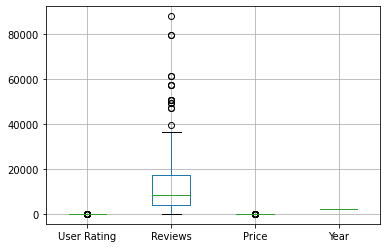

In [32]:
amazon_data.boxplot()

Make a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns. A box plot is a method for graphically depicting groups of numerical data through their quartiles.

boxplot() method can be a Numpy array or Python list or Tuple of arrays. Let us create the box plot by using numpy. random. normal() to create some random data, it takes mean, standard deviation, and the desired number of values as arguments

In [33]:
amazon_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Pandas describe() is used to view some basic statistical details like percentile, mean, std,min,max,count....etc. of a data frame or a series of numeric values. 

In [34]:
amazon_data.hist

<bound method hist_frame of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson      

In [35]:
amazon_data_new=amazon_data [amazon_data ['Price'] == 0]

the abovecode is used to change the price of the  given data of amazon best top selling books 

In [36]:
amazon_data_new

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [37]:
amazon_data_new.count()


Name           12
Author         12
User Rating    12
Reviews        12
Price          12
Year           12
Genre          12
dtype: int64

count() function counts the number of values in each column

In [38]:
amazon_data_dict = {42:5, 71:16.09, 116:9.78, 193:6.08, 219:6.12, 358:3.55, 381:10.28, 461:8.83, 505:6.57, 506:6.57, 507:6.57, 508:6.57}

In [39]:
amazon_data_dict

{42: 5,
 71: 16.09,
 116: 9.78,
 193: 6.08,
 219: 6.12,
 358: 3.55,
 381: 10.28,
 461: 8.83,
 505: 6.57,
 506: 6.57,
 507: 6.57,
 508: 6.57}

 dictionaries (next to other advanced data structures such as the NumPy array) to store its data.

In [40]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 34.4+ KB



The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

DATA CLEANING

In [41]:
amazon_data.isnull() 

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


Syntax: Pandas.isnull(“DataFrame Name”) or DataFrame.isnull()
Parameters: Object to check null values for.
Return Type: Dataframe of Boolean values which are True for NaN values.

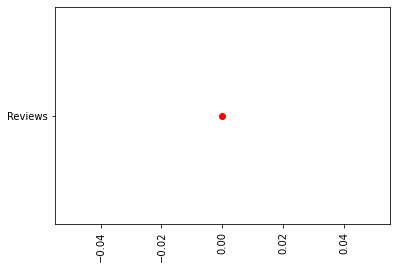

In [42]:
plt.plot("Reviews","ro")
plt.xticks(rotation =90)
plt.show()

Import pyplot from Matplotlib and visualize our DataFrame: import pandas as pd. import matplotlib.pyplot as plt. ...
import pandas as pd. import matplotlib.pyplot as plt. df = pd.read_csv('data.csv') ...
A scatterplot where there are no relationship between the columns: import pandas as pd.
Whether you’re just getting to know a dataset or preparing to publish your findings, visualization is an essential tool. Python’s popular data analysis library, pandas, provides several different options for visualizing your data with .plot(). Even if you’re at the beginning of your pandas journey, you’ll soon be creating basic plots that will yield valuable insights into your data.

In [43]:
amazon_data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Syntax: Pandas.isnull(“DataFrame Name”) or DataFrame.isnull()
Parameters: Object to check null values for.
Return Type: Dataframe of Boolean values which are True for NaN values.
sum() function return the sum of the values for the requested axis. If the input is index axis then it adds all the values in a column and repeats the same for all the columns and returns a series containing the sum of all the values in each column.

array([[<AxesSubplot:title={'center':'User Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

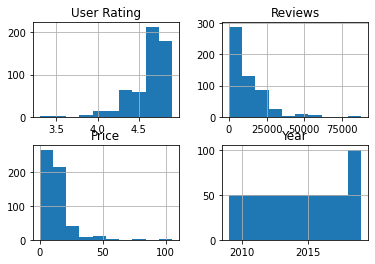

In [44]:
amazon_data.hist()

Its main functionality is to make the Histogram of a given Data frame. The distribution of data is represented by Histogram. When Function Pandas DataFrame. hist() is used, it automatically calls the function matplotlib

This dataset contains information about top 50 bestselling books which are available on "amzon" for the period of year 2009 to 2019. This dataset includes information about title of book, author of book, genre of book, user ratings and number of reviews on book, price of books in dollars and year in which that book was in bestseller list. I will be using Python libraries like NumPy, Pandas, Matplotlib, Seaborn to draw some insights from the dataset. This is the final submission for the course Data Analysis with Python: Zero to Pandas. This course helped me a lot in enhancing my programming skills in Python. This course covers all the topics required for exploratory data analytics in Python and covers topics gradually over a period of time.
The above graph indicates the maximum and minimun properties of amazon top best selling books 
1.In user rating the rating starts from 0 to 200 after sertain season the rating has been decreased
2.In reviews near 25k people are crossed the reach of 300
3.In min prices od the book starts from 50-75 and the maximum prices starts 100-200above
4.The book maximum scales in amazon starts from 2010-2019
We've drawn many inferences from the survey. Here's a summary of a few of them:

In the bestseller list of amazon from year 2009 to 2019 most the books were repeated over the years. From the 550 entries in the list there were only 351 different books in this list.

Reason of upper mentioned point can be that readers like these books so much that these books were purchased by many people even in different years.

Most expensive book in the whole dataset is Diagnostic and Statistical Manual of Mental Disorder (105 dollars).

 in amazon bestseller list from year 2009 to 2019 work of 248 different authors was featured.

Number of reviews increased at a huge pace after year 2012.




Inferences and Conclusion

## References and Future Work


- The dataset used in this project was downloaded from : https://www.kaggle.com/datasets?fileType=csv

- I have taken references from many other websites and projects present while working in this project.
  